In [120]:
pip install split-folders

##### Name : Felix Winston
##### Domisili : Medan
##### Kelas : Dicoding Machine Learning

In [123]:
import zipfile,os
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


In [ ]:
local_zip = '/content/drive/MyDrive/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/split", seed=1, ratio=(0.6, 0.4))

base_dir = '/tmp/rockpaperscissors/split'
training_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

print(len(os.listdir(training_dir)))
print(len(os.listdir(validation_dir)))

Copying files: 2188 files [00:03, 556.06 files/s]

3
3


In [ ]:
print(os.listdir('/tmp/rockpaperscissors/train'))
print(os.listdir('/tmp/rockpaperscissors/val'))

['rock', 'paper', 'scissors']
['rock', 'paper', 'scissors']


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.9999,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)



train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
)



Found 1312 images belonging to 3 classes.
Found 873 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}
{'paper': 0, 'rock': 1, 'scissors': 2}


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 59, 59, 16)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 59, 59, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 28, 28, 32)       

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
pred = model.fit(train_generator,
          epochs=16,
          batch_size=32,
          validation_steps=5,
          verbose=2,
          validation_data=validation_generator,
          steps_per_epoch=20
          )

Epoch 1/16
20/20 - 70s - loss: 1.1370 - accuracy: 0.3386 - val_loss: 1.0955 - val_accuracy: 0.3187 - 70s/epoch - 3s/step
Epoch 2/16
20/20 - 16s - loss: 1.0364 - accuracy: 0.4906 - val_loss: 0.9235 - val_accuracy: 0.6000 - 16s/epoch - 782ms/step
Epoch 3/16
20/20 - 16s - loss: 0.9040 - accuracy: 0.6266 - val_loss: 0.9026 - val_accuracy: 0.6562 - 16s/epoch - 777ms/step
Epoch 4/16
20/20 - 16s - loss: 0.6409 - accuracy: 0.7488 - val_loss: 0.5134 - val_accuracy: 0.8562 - 16s/epoch - 780ms/step
Epoch 5/16
20/20 - 16s - loss: 0.5641 - accuracy: 0.7953 - val_loss: 0.5688 - val_accuracy: 0.8625 - 16s/epoch - 804ms/step
Epoch 6/16
20/20 - 16s - loss: 0.3208 - accuracy: 0.9047 - val_loss: 0.3575 - val_accuracy: 0.8750 - 16s/epoch - 795ms/step
Epoch 7/16
20/20 - 16s - loss: 0.3126 - accuracy: 0.8781 - val_loss: 0.4062 - val_accuracy: 0.8687 - 16s/epoch - 800ms/step
Epoch 8/16
20/20 - 17s - loss: 0.2604 - accuracy: 0.9125 - val_loss: 0.2974 - val_accuracy: 0.9062 - 17s/epoch - 855ms/step
Epoch 9/16


In [ ]:
train_acc_score = model.evaluate(train_generator, batch_size=20)
validate_acc_score = model.evaluate(validation_generator, batch_size=20)

print(f'Train acc score : {train_acc_score[1]}, Validation acc score : {validate_acc_score[1]}')

10/10 [==============================] - 2s 150ms/step - loss: 0.1678 - accuracy: 0.9633
Train acc score : 0.9388222098350525, Validation acc score : 0.9633333086967468


Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (5).png
1/1 [==============================] - 0s 168ms/step
00nKV8oHuTGi20gq (5).png
rock


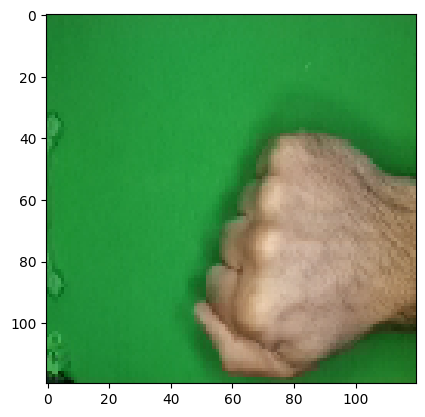

In [125]:
%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(120,120))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(fn)
  if classes[0,0] == 1.0:
      print('paper')
  elif classes[0,1] == 1.0:
      print('rock')
  else:
      print('scissors')

